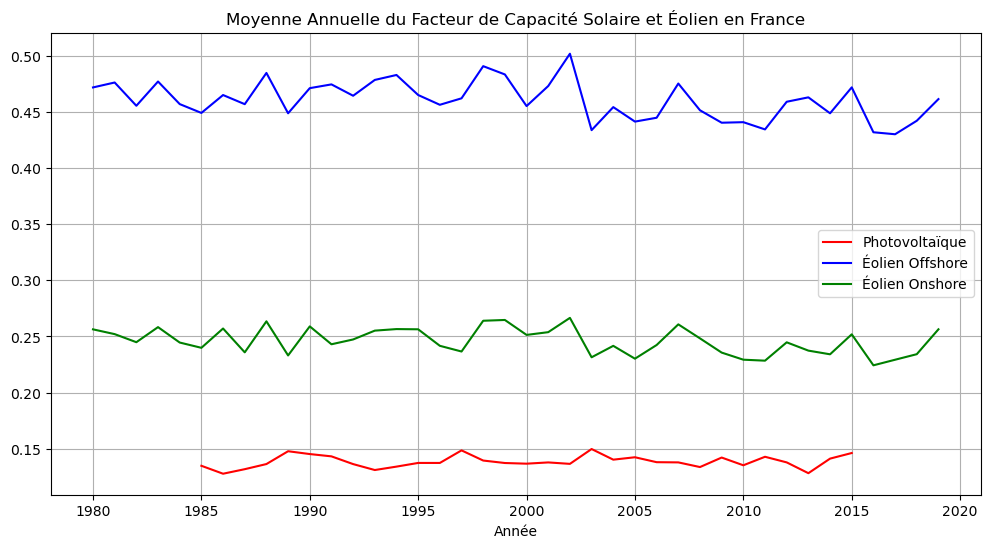

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement et traitement des données photovoltaïques
pv_file_path = 'ninja_pv_country_FR_sarah_corrected.csv'
pv_data = pd.read_csv(pv_file_path, skiprows=2)
pv_data['time'] = pd.to_datetime(pv_data['time'])
pv_data['national'] = pd.to_numeric(pv_data['national'], errors='coerce')
annual_mean_pv = pv_data.groupby(pv_data['time'].dt.year)['national'].mean()

# Chargement et traitement des données éoliennes
wind_file_path = 'ninja_wind_country_FR_current-merra-2_corrected.csv'
wind_data = pd.read_csv(wind_file_path, skiprows=2)
wind_data['time'] = pd.to_datetime(wind_data['time'])
wind_data['offshore'] = pd.to_numeric(wind_data['offshore'], errors='coerce')
wind_data['onshore'] = pd.to_numeric(wind_data['onshore'], errors='coerce')
annual_mean_offshore = wind_data.groupby(wind_data['time'].dt.year)['offshore'].mean()
annual_mean_onshore = wind_data.groupby(wind_data['time'].dt.year)['onshore'].mean()

# Création du graphique
plt.figure(figsize=(12, 6))
annual_mean_pv.plot(kind='line', color='red', label='Photovoltaïque')
annual_mean_offshore.plot(kind='line', color='blue', label='Éolien Offshore')
annual_mean_onshore.plot(kind='line', color='green', label='Éolien Onshore')
plt.title('Moyenne Annuelle du Facteur de Capacité Solaire et Éolien en France')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()